## 📌 Introduction

Steam is the world’s leading platform for digital PC game distribution, hosting a wide range of titles from AAA studios to indie developers. With thousands of games released each year, I was curious to explore how pricing, user behavior, and genre influence a game's success.

In this EDA, titled **"The Economics of Fun: Exploratory Analysis of Steam Games and Pricing Psychology"**, I analyze two datasets (from 2019 and 2025) to uncover patterns in pricing strategies, player engagement, and monetization profiles.

The goal is to combine visual storytelling with data science techniques to better understand what makes games successful — beyond just their genre or budget — and how pricing psychology plays a role in player perception and value.

In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 1.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display

## 📌 Dataset Overview

In [19]:
steam_2019_df = pd.read_csv('/Users/91873/DS19/DS19-EDA/Steam Store Games/steam.csv', delimiter=',', encoding='ISO-8859-1')

In [20]:
steam_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [21]:
steam_2019_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [23]:
steam_2019 = steam_2019_df.drop(columns=[
    'english', 'developer', 'publisher', 'platforms',
    'categories', 'steamspy_tags', 'median_playtime'
])

In [24]:
steam_2019.head(5)

,appid,name,release_date,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,owners,price
0,10,Counter-Strike,2000-11-01,0,Action,0,124534,3339,17612,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,0,Action,0,3318,633,277,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,0,Action,0,3416,398,187,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,0,Action,0,1273,267,258,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,0,Action,0,5250,288,624,5000000-10000000,3.99


In [25]:
steam_2025_df =pd.read_csv('Steam Store Games 2024-2025/games_march2025_cleaned.csv', delimiter=',', encoding='ISO-8859-1')

In [26]:
steam_2025_df.head(5)

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",âA modern multiplayer masterpiece.â 9.5/10...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow SixÂ® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,âOne of the best first-person shooters ever ...,"Tom Clancy's Rainbow SixÂ® Siege is an elite, ...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608


In [28]:
steam_2025_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  object 
 14  window

## 📌 Data Cleaning & Preparation

In [27]:
steam_2025 = steam_2025_df.drop(columns=[
    'dlc_count', 'detailed_description', 'about_the_game', 'short_description',
    'reviews', 'header_image', 'website', 'support_url', 'support_email',
    'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
    'recommendations', 'notes', 'supported_languages', 'full_audio_languages',
    'packages', 'developers', 'publishers', 'screenshots', 'movies',
    'user_score', 'score_rank', 'peak_ccu', 'tags',
    'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent'
])

In [28]:
steam_2025.head(5)

,appid,name,release_date,required_age,price,achievements,categories,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",7480813,1135108,100000000 - 200000000,33189,879,5174,350,0
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,37,"['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",1487960,1024436,50000000 - 100000000,0,0,0,0,0
2,570,Dota 2,2013-07-09,0,0.00,0,"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",1998462,451338,200000000 - 500000000,43031,1536,898,892,0
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,77,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",1719950,250012,50000000 - 100000000,19323,771,7101,74,0
4,359550,Tom Clancy's Rainbow SixÂ® Siege,2015-12-01,17,3.99,0,"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],1152763,218446,20000000 - 50000000,14204,682,2434,306,80


In [29]:
# Rename columns in 2019 to match 2025 structure
steam_2019.rename(columns={
    'owners': 'estimated_owners',
    'positive_ratings': 'positive',
    'negative_ratings': 'negative',
    'average_playtime': 'average_playtime_forever'
}, inplace=True)

# Add source column to both datasets
steam_2019['source'] = '2019'
steam_2025['source'] = '2025'

In [30]:
# Make a list for common columns
common_cols = [
    'appid', 'name', 'release_date', 'price', 'estimated_owners',
    'positive', 'negative', 'average_playtime_forever',
    'achievements', 'genres', 'source'
]

In [31]:
# Combined datasets
combined_steam_df = pd.concat([
    steam_2019[common_cols],
    steam_2025[common_cols]
], ignore_index=True)

In [32]:
print("Combined shape:", combined_steam_df.shape)
print("Columns:", combined_steam_df.columns.tolist())
combined_steam_df

Combined shape: (116693, 11)
Columns: ['appid', 'name', 'release_date', 'price', 'estimated_owners', 'positive', 'negative', 'average_playtime_forever', 'achievements', 'genres', 'source']


,appid,name,release_date,price,estimated_owners,positive,negative,average_playtime_forever,achievements,genres,source
0,10,Counter-Strike,2000-11-01,7.19,10000000-20000000,124534,3339,17612,0,Action,2019
1,20,Team Fortress Classic,1999-04-01,3.99,5000000-10000000,3318,633,277,0,Action,2019
2,30,Day of Defeat,2003-05-01,3.99,5000000-10000000,3416,398,187,0,Action,2019
3,40,Deathmatch Classic,2001-06-01,3.99,5000000-10000000,1273,267,258,0,Action,2019
4,50,Half-Life: Opposing Force,1999-11-01,3.99,5000000-10000000,5250,288,624,0,Action,2019
...,...,...,...,...,...,...,...,...,...,...,...
116688,2115110,Outrun Them,2024-02-29,3.99,0 - 20000,2,0,0,6,"['Indie', 'Early Access']",2025
116689,1174200,Lands of Pharaoh: Episode 1,2020-01-07,10.00,0 - 20000,2,0,0,0,"['Action', 'Adventure', 'Indie', 'Strategy']",2025
116690,1160190,Player One,2019-10-10,1.99,0 - 20000,2,1,0,0,"['Indie', 'Early Access']",2025
116691,3380340,DragonRoad,2025-01-25,29.99,0 - 20000,2,0,0,34,"['Adventure', 'RPG', 'Simulation', 'Strategy']",2025


In [30]:
# Sort by 'source' so that 2025 rows come after 2019
combined_steam_df = combined_steam_df.sort_values(by='source', ascending=True)

# Drop duplicates based on 'appid', keeping the 2025 version if duplicated
combined_steam_df = combined_steam_df.drop_duplicates(subset='appid', keep='last')


In [43]:
combined_steam_df

,appid,name,release_date,price,estimated_owners,positive,negative,average_playtime_forever,achievements,genres,source,year,owners_min,estimated_revenue
0,10,Counter-Strike,2000-11-01,7.19,10000000-20000000,124534,3339,17612,0,Action,2019,2000,10000000.0,71900000.0
18051,734010,Kolbeinn,2017-10-30,3.19,0-20000,13,7,0,0,Adventure;Indie,2019,2017,0.0,0.0
18049,733980,Lost jumping frog,2017-10-30,0.79,0-20000,15,15,0,0,Adventure;Indie,2019,2017,0.0,0.0
18058,734380,Sacrament,2018-03-08,1.69,0-20000,8,19,0,0,Adventure;Casual;Indie,2019,2018,0.0,0.0
18036,733650,ShineG In The SeaFight,2018-01-19,3.99,0-20000,33,2,0,48,Action;Adventure;Casual;Indie;RPG,2019,2018,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56943,801400,Hoser Hockey,2020-11-30,3.99,0 - 20000,34,12,0,0,"['Action', 'Indie', 'Simulation', 'Sports']",2025,2020,0.0,0.0
56942,1209440,capy hoky,2020-01-17,2.99,0 - 20000,45,7,0,5,"['Casual', 'Indie', 'Sports']",2025,2020,0.0,0.0
56941,655020,Unreal Estate,2017-06-16,0.00,0 - 20000,30,12,0,12,"['Casual', 'Indie', 'Simulation', 'Strategy']",2025,2017,0.0,0.0
56949,2422610,Love Love Candy,2023-10-28,7.99,0 - 20000,0,0,0,12,['Casual'],2025,2023,0.0,0.0


## 📌 Feature Engineering

In [34]:
# Convert release_date to datetime
combined_steam_df['release_date'] = pd.to_datetime(combined_steam_df['release_date'], errors='coerce')


In [35]:
# Extract release year
combined_steam_df['year'] = combined_steam_df['release_date'].dt.year

In [36]:
# The average of the range
def parse_owner_range(val):
    try:
        # Normalize dashes
        val = val.replace('–', '-')
        parts = val.replace(',', '').split('-')
        if len(parts) == 2:
            low = float(parts[0])
            high = float(parts[1])
            return (low + high) / 2  # Use midpoint as estimate
    except:
        return None

combined_steam_df['owners_avg'] = combined_steam_df['estimated_owners'].apply(parse_owner_range)


In [37]:
# Calculate revenue
combined_steam_df['estimated_revenue'] = combined_steam_df['owners_avg'] * combined_steam_df['price']

In [38]:
combined_steam_df.head()

,appid,name,release_date,price,estimated_owners,positive,negative,average_playtime_forever,achievements,genres,source,year,owners_avg,estimated_revenue
0,10,Counter-Strike,2000-11-01,7.19,10000000-20000000,124534,3339,17612,0,Action,2019,2000,15000000.0,107850000.0
1,20,Team Fortress Classic,1999-04-01,3.99,5000000-10000000,3318,633,277,0,Action,2019,1999,7500000.0,29925000.0
2,30,Day of Defeat,2003-05-01,3.99,5000000-10000000,3416,398,187,0,Action,2019,2003,7500000.0,29925000.0
3,40,Deathmatch Classic,2001-06-01,3.99,5000000-10000000,1273,267,258,0,Action,2019,2001,7500000.0,29925000.0
4,50,Half-Life: Opposing Force,1999-11-01,3.99,5000000-10000000,5250,288,624,0,Action,2019,1999,7500000.0,29925000.0


In [39]:
combined_steam_df[['appid', 'name', 'year', 'price', 'owners_avg', 'estimated_revenue']].head()


,appid,name,year,price,owners_avg,estimated_revenue
0,10,Counter-Strike,2000,7.19,15000000.0,107850000.0
1,20,Team Fortress Classic,1999,3.99,7500000.0,29925000.0
2,30,Day of Defeat,2003,3.99,7500000.0,29925000.0
3,40,Deathmatch Classic,2001,3.99,7500000.0,29925000.0
4,50,Half-Life: Opposing Force,1999,3.99,7500000.0,29925000.0


## 📌 Exploratory Visuals

## 📌 1. Price Trend Over Time

This visual shows how the average Steam game price has changed each year.  
It helps reveal trends in game pricing strategy and market behavior.

In [40]:
from ipywidgets import interact

@interact(
    start_year=widgets.IntSlider(min=2000, max=2025, step=1, value=2010, description='Start Year'),
    end_year=widgets.IntSlider(min=2000, max=2025, step=1, value=2025, description='End Year')
)
def plot_avg_price_range(start_year, end_year):
    if start_year >= end_year:
        print("Start year must be less than end year.")
        return

    # Filter the data
    df = combined_steam_df[
        (combined_steam_df['year'] >= start_year) & 
        (combined_steam_df['year'] <= end_year)
    ].dropna(subset=['year', 'price'])

    avg_price_by_year = df.groupby('year')['price'].mean()

    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o')

    # Add labels at each point
    for year, price in avg_price_by_year.items():
        plt.text(year, price + 0.1, f"${price:.2f}", ha='center', fontsize=8)

    plt.title(f'Average Game Price from {start_year} to {end_year}')
    plt.xlabel('Year')
    plt.ylabel('Average Price ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=2010, description='Start Year', max=2025, min=2000), IntSlider(value=202…

### 🔍 Key Insights:

- Prices peaked around **2012–2013**, possibly due to AAA titles or fewer indie games.
- A clear **decline from 2014 to 2018** suggests rising indie influence or market competition.
- Prices have **stabilized post-2020**, indicating a more mature and consistent pricing strategy.

## 📌 2. Estimated Revenue Trend by Year

This chart shows how the **total estimated revenue** of Steam games released each year has changed from 2010 to 2025.

It highlights the growth of the Steam marketplace and offers insight into how release volume and pricing trends influence overall platform revenue.


In [41]:
from ipywidgets import interact, IntSlider

@interact(
    start_year=IntSlider(min=2000, max=2025, step=1, value=2010, description='Start Year'),
    end_year=IntSlider(min=2000, max=2025, step=1, value=2025, description='End Year')
)
def plot_revenue_range(start_year, end_year):
    if start_year >= end_year:
        print("Start year must be less than end year.")
        return

    # Filter data for selected range
    df = combined_steam_df[
        (combined_steam_df['year'] >= start_year) & 
        (combined_steam_df['year'] <= end_year)
    ].dropna(subset=['year', 'estimated_revenue'])

    # Group and sum revenue
    revenue_by_year = df.groupby('year')['estimated_revenue'].sum()

    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=revenue_by_year.index, y=revenue_by_year.values, marker='o')

    # Add data labels in millions
    for year, revenue in revenue_by_year.items():
        plt.text(year, revenue + revenue * 0.01, f"${revenue / 1e6:.1f}M", ha='center', fontsize=8)

    plt.title(f'Estimated Total Revenue from {start_year} to {end_year}')
    plt.xlabel('Year')
    plt.ylabel('Estimated Revenue ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=2010, description='Start Year', max=2025, min=2000), IntSlider(value=202…

### 🔍 Key Insights:

This chart highlights the **massive growth** of Steam's revenue from 2010 to 2025.

- Revenue rose steadily from ~$1.7B in 2010 to a **peak of ~$19.5B in 2024**.
- Noticeable dips (e.g., 2017, 2025) may reflect **market saturation, fewer premium launches, or data lag**.
- The trend demonstrates Steam’s shift from a niche platform to a major global marketplace.

## 📌 3. Psychological Pricing Patterns

This chart explores how Steam games are priced, focusing on the **last two digits** (e.g., `.99`, `.00`, `.49`).

It reveals whether developers favor psychological pricing — a marketing strategy where prices like `$9.99` feel cheaper than `$10.00`.


C:\Users\91873\AppData\Local\Temp\ipykernel_15640\3505015969.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bucket_counts.values, y=bucket_counts.index, palette="Set2")


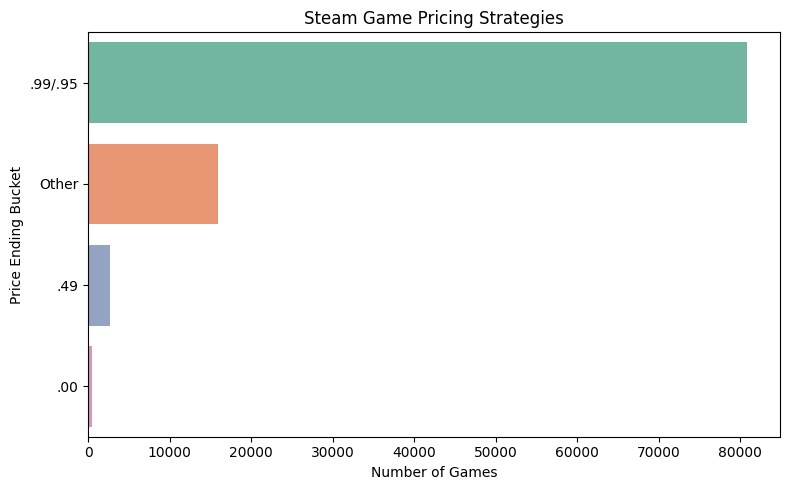

In [42]:
def categorize_price_ending(x):
    cents = int(round((x - int(x)) * 100))  # Extract cents
    if cents == 0:
        return '.00'
    elif cents == 49:
        return '.49'
    elif cents in [99, 95]:
        return '.99/.95'
    else:
        return 'Other'

# Apply and count
priced_games = combined_steam_df[combined_steam_df['price'] > 0].copy()
priced_games['price_bucket'] = priced_games['price'].apply(categorize_price_ending)

# Count frequency
bucket_counts = priced_games['price_bucket'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=bucket_counts.values, y=bucket_counts.index, palette="Set2")
plt.title("Steam Game Pricing Strategies")
plt.xlabel("Number of Games")
plt.ylabel("Price Ending Bucket")
plt.tight_layout()
plt.show()


### 🔍 Key Insights:

Steam developers overwhelmingly favor **psychological pricing tactics**.

- Over **70,000 games** end with **.99 or .95**, leveraging buyer psychology.
- Very few games use exact pricing like **.00**, showing preference for “perceived deal” pricing.
- This confirms that pricing strategies on Steam are not random — they’re **intentionally designed** to influence perception.

Visualizing these buckets gives a strong signal: **Steam pricing psychology is real and dominant**.

## 📌 4. Price vs Positive Review %

This scatter plot explores the relationship between a game's **price** and its **user score**.

- Are expensive games always better rated?
- Do budget games still deliver great experiences?

This visualization helps reveal whether Steam users associate **price with value**.


In [43]:
# Create the pct_pos_total column
combined_steam_df['total_reviews'] = combined_steam_df['positive'] + combined_steam_df['negative']
combined_steam_df['pct_pos_total'] = (combined_steam_df['positive'] / combined_steam_df['total_reviews']) * 100
combined_steam_df.pct_pos_total

0          97.388815
1          83.978740
2          89.564761
3          82.662338
4          94.799567
             ...    
116688    100.000000
116689    100.000000
116690     66.666667
116691    100.000000
116692     66.666667
Name: pct_pos_total, Length: 116693, dtype: float64

In [44]:
combined_steam_df = combined_steam_df[combined_steam_df['total_reviews'] > 0]

In [45]:
from ipywidgets import interact, IntSlider
@interact(year_min=IntSlider(min=2000, max=2025, step=1, value=2010, description='From Year'),
          year_max=IntSlider(min=2000, max=2025, step=1, value=2025, description='To Year'))
def plot_price_vs_score(year_min, year_max):
    filtered = combined_steam_df[
        (combined_steam_df['year'] >= year_min) &
        (combined_steam_df['year'] <= year_max) &
        (combined_steam_df['price'] > 0)
    ]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered, x='price', y='pct_pos_total', alpha=0.5)
    plt.title(f'Price vs Positive Review % ({year_min}–{year_max})')
    plt.xlabel('Price ($)')
    plt.ylabel('Positive Review %')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=2010, description='From Year', max=2025, min=2000), IntSlider(value=2025…

### 🔍 Key Insights:
- The majority of games are priced under $50, with a high concentration below $20.
- **Positive review percentage** is widely scattered across all price points.
- No strong correlation is observed — indicating that **price does not reliably predict user satisfaction**.
- Both **cheap indie games** and **expensive AAA titles** can receive either high or low user feedback.


## 📌 5. Playtime per Dollar by Price Range

> **Objective:**  
> Assess how much engagement players get per dollar spent — are cheaper games offering better value?

This derived metric helps reveal whether players get more playtime from low-cost indie titles or premium-priced games.


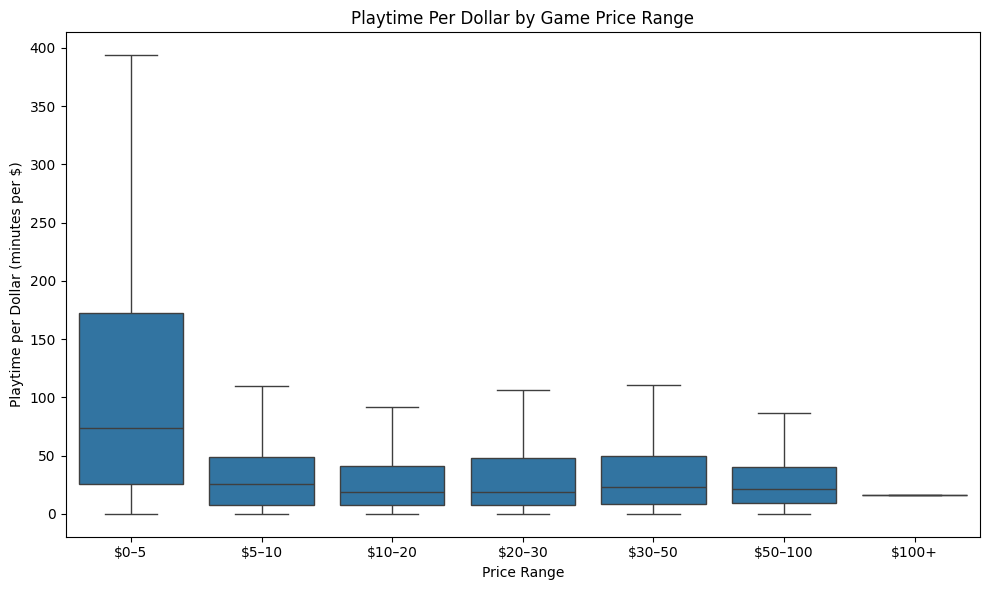

In [46]:
# Filter valid rows and calculate playtime per dollar
df_ppd = combined_steam_df.copy()
df_ppd = df_ppd[(df_ppd['price'] > 0) & (df_ppd['average_playtime_forever'] > 0)]
df_ppd['playtime_per_dollar'] = df_ppd['average_playtime_forever'] / df_ppd['price']

# Create price bins
price_bins = [0, 5, 10, 20, 30, 50, 100, df_ppd['price'].max()]
price_labels = ['$0–5', '$5–10', '$10–20', '$20–30', '$30–50', '$50–100', '$100+']
df_ppd['price_bin'] = pd.cut(df_ppd['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ppd, x='price_bin', y='playtime_per_dollar', showfliers=False)
plt.title('Playtime Per Dollar by Game Price Range')
plt.xlabel('Price Range')
plt.ylabel('Playtime per Dollar (minutes per $)')
plt.tight_layout()
plt.show()

### 🔍 Key Insights:

The boxplot shows that cheaper games (especially under $5) offer the highest **playtime per dollar**, often delivering **significantly more minutes of engagement** for each dollar spent.

However, this category also shows the most variation — meaning while some cheap games offer great value, others may not.

As price increases, the median value decreases, and the spread narrows, indicating **more consistent but lower playtime per dollar** among mid to high-priced games.

## 📌 6. Monetization Clusters (KMeans + PCA)

To uncover deeper patterns in how games monetize, we applied **KMeans clustering** across key features:  
`price_final`, `average_playtime`, and `estimated_owners`.

Since these features exist in different scales, we:
- **Standardized** the variables for fair comparison
- Applied **Principal Component Analysis (PCA)** to reduce dimensionality
- Visualized clusters in **2D** using the top two principal components

This helps us **visually separate monetization profiles**, such as:
- High-playtime low-price games (e.g., indie or F2P with high retention)
- Premium-priced lower-playtime titles (e.g., narrative AAA games)
- Outliers with extreme price or inflated playtime

Clusters are color-coded for interpretability.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select and prepare features
features_df = combined_steam_df.copy()

# Create pct_pos_total if not already present
features_df['total_reviews'] = features_df['positive'] + features_df['negative']
features_df = features_df[features_df['total_reviews'] > 0]
features_df['pct_pos_total'] = (features_df['positive'] / features_df['total_reviews']) * 100

# Only keep valid rows
features_df = features_df[
    (features_df['price'] > 0) &
    (features_df['average_playtime_forever'] > 0) &
    (features_df['owners_avg'] > 0) &
    (features_df['estimated_revenue'] > 0)
]

# Select relevant features
X = features_df[['price', 'average_playtime_forever', 'owners_avg', 'estimated_revenue', 'pct_pos_total']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [49]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(X_pca)


In [50]:
# Assign cluster labels to the original feature dataset
features_df['cluster'] = kmeans.labels_

# Rename clusters programmatically
cluster_labels = {
    0: 'Value Blockbusters',
    1: 'Premium Niche',
    2: 'Addictive Low-Cost',
    3: 'Casual Quick Plays'
}

features_df['cluster_name'] = features_df['cluster'].map(cluster_labels)
pca_df['cluster_name'] = pca_df['cluster'].map(cluster_labels)


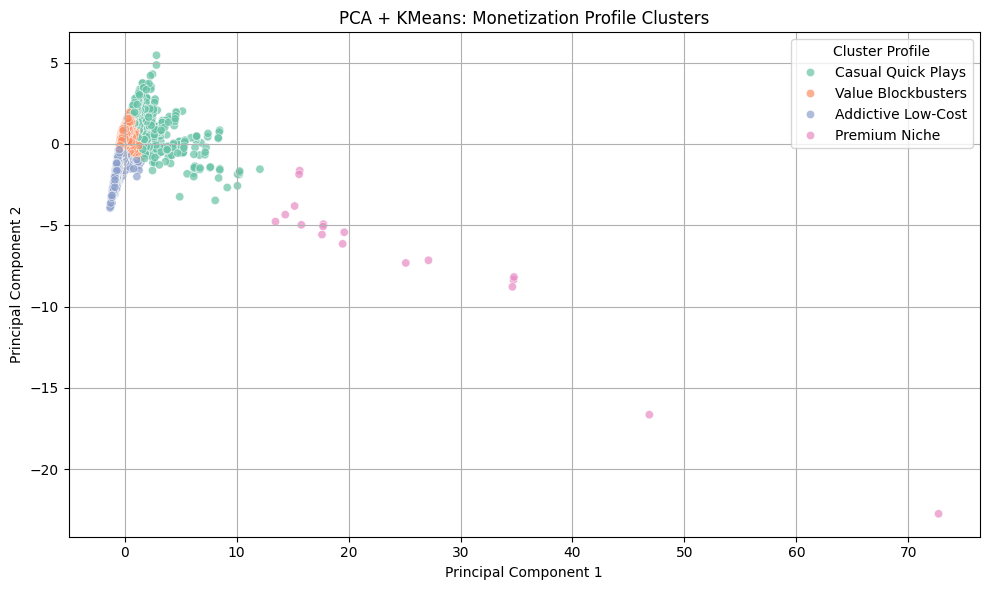

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_name', palette='Set2', alpha=0.7)
plt.title('PCA + KMeans: Monetization Profile Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Profile')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔍 Key Insights:
- **Not all expensive games are engaging:** "Premium Niche" games charge more but aren't always time-sinks.
- **Affordable doesn’t mean shallow:** "Addictive Low-Cost" titles show high engagement at minimal cost.
- **Value Blockbusters** stand out as games offering the best balance of revenue and engagement — possible genre flagships.
- This clustering reveals **diverse monetization strategies** — helping developers understand where their game might fit competitively.

This analysis goes beyond surface metrics and segments games into **actionable profiles**, which can inform pricing, marketing, or design decisions.

## 📌 7. Genre vs Success Correlation (Heatmap)

This analysis explores how different game genres correlate with various success indicators such as:

- 💰 Estimated Revenue
- 🧍 Average Owners
- 💵 Price
- 🏆 Achievements
- ⏱️ Playtime

By converting genres into binary flags (one-hot encoding), we generate a correlation matrix that reveals which genres are more likely associated with commercial success or player engagement.

This helps answer:
- Do RPGs monetize better than Casual games?
- Are Strategy titles priced higher?
- Which genres are most correlated with user interest?

In [108]:
from collections import Counter

# Copy the cleaned/combined dataset
df_cleaned = combined_steam_df.copy()

# Feature Engineering
df_cleaned['estimated_revenue'] = df_cleaned['price'] * df_cleaned['owners_avg']
df_cleaned['average_playtime'] = df_cleaned['average_playtime_forever']

In [109]:
# Clean and parse genres
df_cleaned['genres'] = df_cleaned['genres'].fillna('').apply(lambda x: [g.strip() for g in x.split(';') if g.strip()])

In [110]:
# Identify top 10 most common genres
all_genres = df_cleaned['genres'].explode()
top_genres = [genre for genre, count in Counter(all_genres).most_common(10)]

In [112]:
# One-hot encode top genres
for genre in top_genres:
    df_cleaned[f'genre_{genre}'] = df_cleaned['genres'].apply(lambda x: int(genre in x))

In [113]:
# Select columns for correlation
corr_columns = [
    'price', 'owners_avg', 'estimated_revenue', 'achievements', 'average_playtime'
] + [f'genre_{g}' for g in top_genres]

df_corr = df_cleaned[corr_columns].dropna()

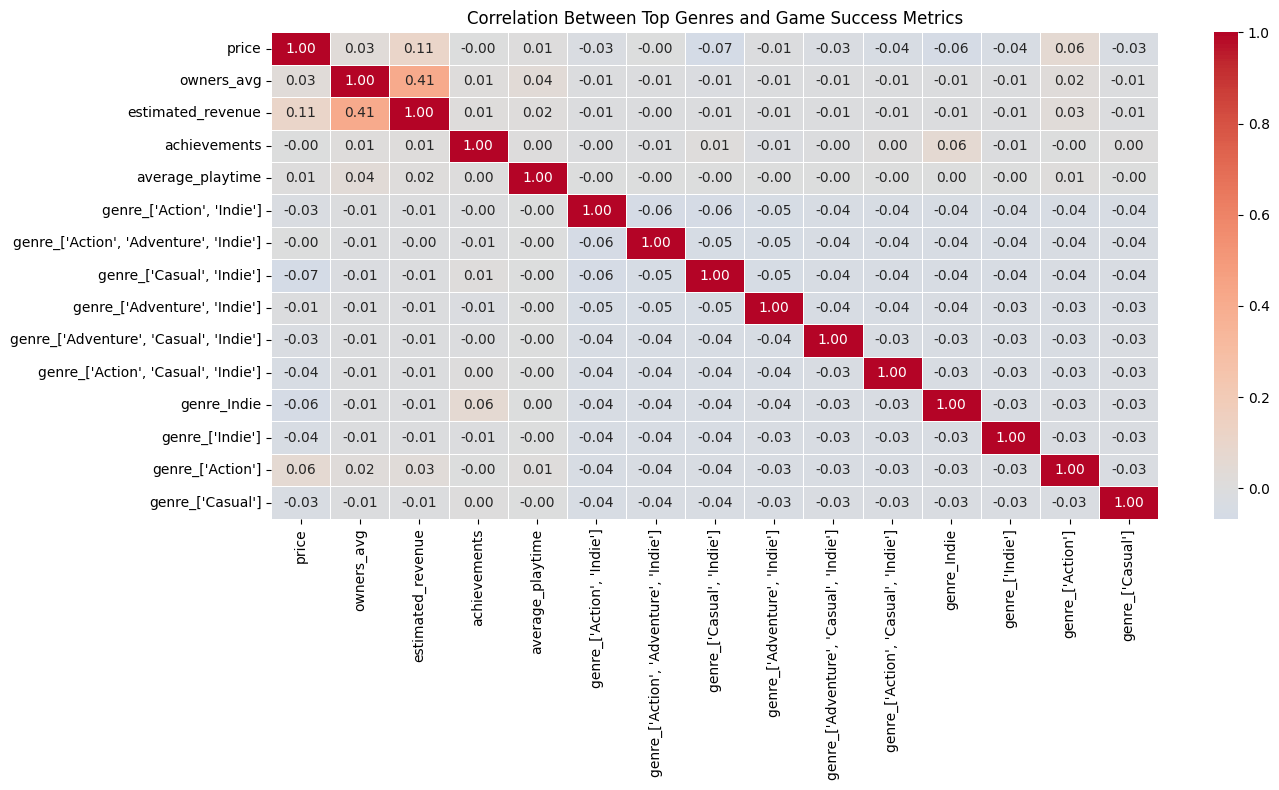

In [115]:
# Generate the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Between Top Genres and Game Success Metrics")
plt.tight_layout()
plt.show()

#### 🔍 Key Insights:
- No strong correlation was observed between specific genres and success metrics.
- The correlation coefficients are generally weak (close to 0), indicating **genre alone does not drive success**.
- For example, genres like "Action", "Casual", or "Indie" do not show a strong relationship with revenue or engagement.

While genre may influence player expectations or initial discovery, it is **not a reliable predictor** of how well a game will perform in terms of revenue, playtime, or popularity. This suggests that developers should consider other factors — such as pricing strategy, game quality, and player retention — when aiming for commercial success.

## 📌 Final Key Takeaways & Insights

- 💸 **Game Prices Have Stabilized**  
  After a peak around 2012–2013, average game prices decreased and then leveled out — suggesting pricing strategies matured post-2015.

- 📈 **Revenue Has Grown Despite Price Drops**  
  Estimated total revenue consistently increased, driven by higher volume of releases and ownership growth, rather than pricing alone.

- 🧠 **Charm Pricing Dominates**  
  A significant majority of games use psychological pricing endings like **$0.99 or $0.95**, confirming industry-wide behavioral pricing tactics.

- ⭐ **Higher Price Doesn’t Guarantee Better Ratings**  
  There’s **no strong correlation** between price and user sentiment (positive review %), indicating value is often perceived beyond cost.

- 🕹️ **Low-Cost Games Offer High Engagement**  
  Games priced under $5 provide **the most playtime per dollar**, indicating strong value and possible viral or indie success stories.

- 🔍 **Clustering Reveals Diverse Monetization Profiles**  
  KMeans + PCA clustering uncovered **distinct groups** of games — including outliers with **very high playtime** but low price.

- 🔥 **Genres Alone Don’t Drive Success**  
  Correlation heatmap shows that **genre popularity has minimal direct impact** on revenue, playtime, or achievements — suggesting quality, marketing, and gameplay matter more than genre labels.


## 🚀 Further Analysis & Future Work

1. **Time Series Analysis**  
   - Explore trends in pricing, reviews, and revenue over the years (especially pre- vs post-pandemic game sales).

2. **Sentiment Analysis on Reviews**  
   - Apply NLP techniques to user reviews to understand how sentiment aligns with pricing or engagement.

3. **DLC and Microtransaction Impact**  
   - Re-include `dlc_count` and investigate how downloadable content correlates with revenue or game longevity.

4. **Recommendation System**  
   - Use clustering or collaborative filtering to suggest games based on monetization and engagement profiles.

5. **Deep Dive into Free-to-Play Models**  
   - Compare success metrics between free games and paid games; explore monetization strategies like ads or cosmetics.
